<a href="https://colab.research.google.com/github/Shivam4681/House-Sales-Prediction/blob/main/House_Sales_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales Prediction Using Machine Learning

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train data

In [2]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2: Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
m = df.isna().sum()
m[m>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [5]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y (SalePrice)


In [6]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Step 4: Feature Selection Pipeline

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [13]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ordinal', OrdinalEncoder())])

In [14]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform="pandas")

In [15]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


### Step 5: Feature selection

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [17]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, n_features_to_select="auto", direction="backward")
sel.fit(X_pre, Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__YrSold',
       'cat__LandContour', 'cat__Neighborhood', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__Foundation', 'cat__BsmtQual',
       'cat__BsmtExposure', 'cat__BsmtFinType1', 'cat__BsmtFinType2',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__GarageFinish', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [18]:
imp_cols[0].split('__')

['num', 'MSSubClass']

In [19]:
sel_cols = [i.split('__')[1] for i in imp_cols]
sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [20]:
X_sel = X[sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,PavedDrive,MiscFeature,SaleCondition
0,60,8450,7,5,2003,196.0,0,856,854,0,...,No,GLQ,Unf,Ex,Gd,Typ,RFn,Y,NaN,Normal
1,20,9600,6,8,1976,0.0,0,1262,0,0,...,Gd,ALQ,Unf,Ex,TA,Typ,RFn,Y,NaN,Normal
2,60,11250,7,5,2001,162.0,0,920,866,0,...,Mn,GLQ,Unf,Ex,Gd,Typ,RFn,Y,NaN,Normal
3,70,9550,7,5,1915,0.0,0,961,756,0,...,No,ALQ,Unf,Gd,Gd,Typ,Unf,Y,NaN,Abnorml
4,60,14260,8,5,2000,350.0,0,1145,1053,0,...,Av,GLQ,Unf,Ex,Gd,Typ,RFn,Y,NaN,Normal


### Step 6: Create a final Pipeline for X_Sel

In [21]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [22]:
cat_sel

['LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [23]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold']

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [26]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False))])

In [27]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [28]:
X_sel_pre = pre2.fit_transform(X_sel)

In [29]:
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,-0.288653,-0.793434,1.161852,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,-0.288653,0.257140,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,-0.288653,-0.627826,1.189351,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.288653,-0.521734,0.937276,-0.120242,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,-0.288653,-0.045611,1.617877,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y,
                                                test_size=0.2, random_state=21)

In [31]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.288653,-1.122062,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,-0.288653,-1.049608,0.504166,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.213629,0.427923,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.436865,-0.369064,1.109145,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.288653,1.012726,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [33]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,-0.288653,-0.187930,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,-0.288653,0.060481,1.038106,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.288653,1.374993,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,-0.288653,0.707387,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.288653,-1.145350,0.286466,-0.120242,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


### Step 7: Build the ML models

In [35]:
# Linear Regression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [36]:
model1.score(xtrain, ytrain)

0.9191468338612233

In [37]:
model1.score(xtest, ytest)

-1.1547005301672274e+18

### Implement Ridge and Lasso with Hyperparameter tuning

### 1. Ridge

In [38]:
import numpy as np
params1 = {'alpha':np.arange(0.1, 50, 0.1)}
params1

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
model_ridge = Ridge()
gscv_ridge = GridSearchCV(model_ridge, param_grid=params1, cv=5, scoring='r2')
gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       43. , 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. ,
       44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1,
       45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2,
       46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3,
       47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4,
       48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5,
       49.6, 49.7, 49.8, 49.9])},
             scoring='r2')

In [41]:
gscv_ridge.best_params_

{'alpha': 19.500000000000004}

In [42]:
gscv_ridge.best_score_

0.8497590121448144

In [43]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=19.500000000000004)

In [44]:
best_ridge.score(xtrain, ytrain)

0.8864055345532958

In [45]:
best_ridge.score(xtest, ytest)

0.8370403292627012

### 2. Lasso

In [46]:
params2 = {'alpha': np.arange(1, 200, 1)}
params2

{'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [47]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
gscv_lasso = GridSearchCV(model_lasso, param_grid=params2, cv=5, scoring='r2')
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
             scoring='r2')

In [48]:
gscv_lasso.best_params_

{'alpha': 87}

In [49]:
gscv_lasso.best_score_

0.8559889151490119

In [50]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=87)

In [51]:
best_lasso.score(xtrain, ytrain)

0.9126125298864879

In [52]:
best_lasso.score(xtest, ytest)

0.8295021585641117

### Perform model evaluation

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [54]:
def evaluate(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 score : {r2:.4f}')

In [55]:
# Linear Regression
print("Test Results : ")
evaluate(model1, xtest, ytest)

Test Results : 
Mean Squared Error : 7825765739979397281020379136.00
Root Mean Squared Error : 88463358177153.77
Mean Absolute error : 5176926480476.64
Mean Absolute Percentage Error : 18228614.4104
R2 score : -1154700530167227392.0000


In [56]:
# Ridge
print("Test Results : ")
evaluate(best_ridge, xtest, ytest)

Test Results : 
Mean Squared Error : 1104428529.25
Root Mean Squared Error : 33232.94
Mean Absolute error : 17493.97
Mean Absolute Percentage Error : 0.1005
R2 score : 0.8370


In [57]:
# Lasso
print("Test Results : ")
evaluate(best_lasso, xtest, ytest)

Test Results : 
Mean Squared Error : 1155517063.85
Root Mean Squared Error : 33992.90
Mean Absolute error : 17221.61
Mean Absolute Percentage Error : 0.0994
R2 score : 0.8295


### From above data ridge model performs best with R2 score in test of 0.8165

### Use ridge model for out of sample predictions

In [58]:
xnew = pd.read_csv("testing_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCa...
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Neighborhood', 'HouseStyle',
                                  'RoofMatl', 'Exterior1st', 'MasVnrType',
                                  'ExterQual', 'Foundation', 'BsmtQual',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageFinish', 'PavedDrive',
                                  'MiscFeature', 'SaleCondition'])])

In [60]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.604293,-0.689929,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,-0.288653,0.430511,-0.795163,-0.120242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,-0.288653,-0.607125,0.811239,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,-0.288653,-0.612300,0.758532,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.288653,0.303718,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
preds = best_ridge.predict(xnew_pre)
preds

array([[116075.3620169 ],
       [145012.28258976],
       [171674.96787876],
       ...,
       [170538.2419295 ],
       [107533.30197639],
       [220974.50389755]])

In [62]:
df_final = xnew[['Id']]
df_final['SalePrice_pred'] = preds

In [63]:
df_final['SalePrice_pred'] = df_final['SalePrice_pred'].round(2)
df_final.head()

,Id,SalePrice_pred
0,1461,116075.36
1,1462,145012.28
2,1463,171674.97
3,1464,186006.98
4,1465,199449.78


<Axes: xlabel='SalePrice', ylabel='Count'>

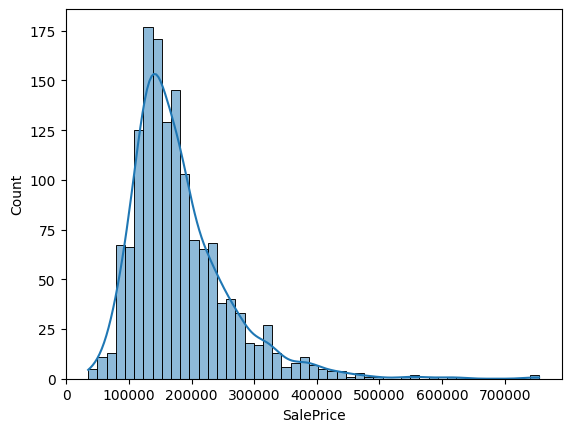

In [64]:
# Actual data
import seaborn as sns
sns.histplot(data=df, x="SalePrice", kde=True)

<Axes: xlabel='SalePrice_pred', ylabel='Count'>

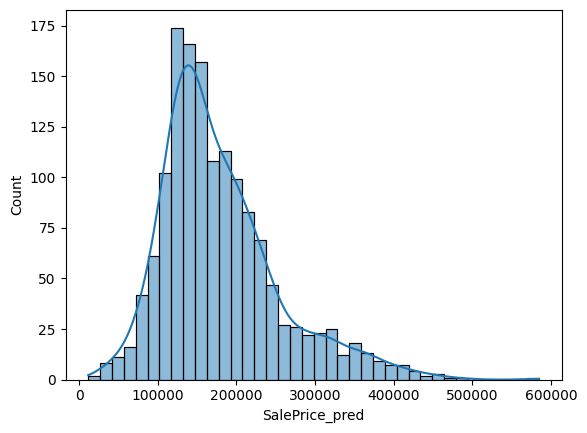

In [67]:
# Predicted values
sns.histplot(data=df_final, x="SalePrice_pred", kde=True)

In [68]:
df_final.to_csv("Results.csv", index=False)